<a href="https://colab.research.google.com/github/sadhiika/digit-recognizer/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib tensorflow numpy

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


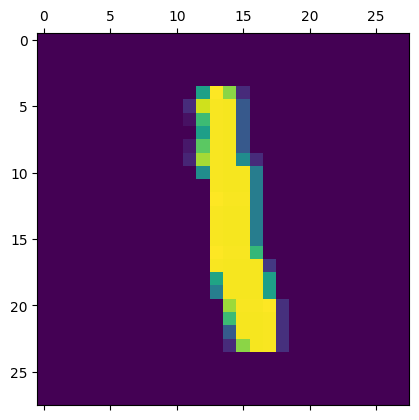

In [4]:
plt.matshow(X_train[6])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4672 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9259


In [8]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2691 - accuracy: 0.9251


[0.2691260874271393, 0.9251000285148621]

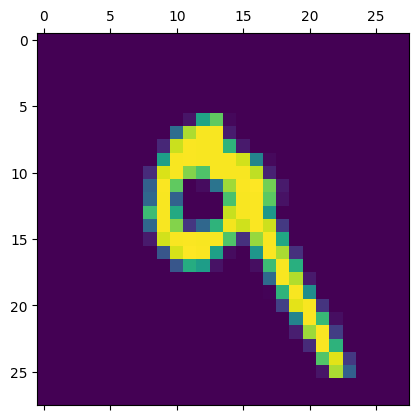

In [9]:
plt.matshow(X_test[7])

In [10]:
y_predicted = model.predict(X_test_flattened)
y_predicted[7]
np.argmax(y_predicted[7])

313/313 [==============================] - 1s 2ms/step


9

Saving drawn_one.png to drawn_one.png
1/1 [==============================] - 0s 28ms/step


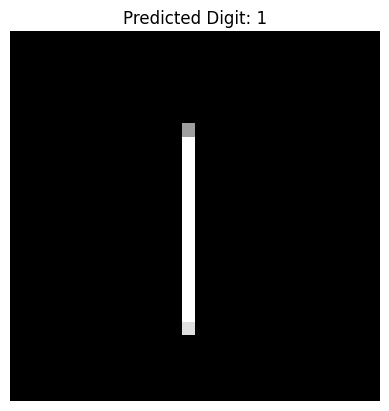

Prediction array: [[0.03419311 0.92520946 0.41510174 0.2848417  0.13848567 0.7782359
  0.61268175 0.12050655 0.64695895 0.17947946]]
Predicted digit: 1


In [11]:
from PIL import Image
from google.colab import files
# Function to preprocess and predict an image
def preprocess_and_predict(image_path):
    try:
        # Read the image in grayscale
        image = Image.open(image_path).convert('L')
        image = image.resize((28, 28))  # Ensure the image is 28x28 pixels

        # Invert the image colors if necessary (white digits on black background)
        image = np.invert(image)

        # Preprocess the image
        image_array = np.array(image) / 255.0  # Normalize
        image_flattened = image_array.reshape(1, 28*28)  # Flatten

        # Predict the digit
        prediction = model.predict(image_flattened)
        predicted_digit = np.argmax(prediction)

        # Display the image and prediction
        plt.imshow(image_array, cmap='gray')
        plt.title(f'Predicted Digit: {predicted_digit}')
        plt.axis('off')
        plt.show()

        # Print the prediction array for debugging
        print(f"Prediction array: {prediction}")
        print(f"Predicted digit: {predicted_digit}")
    except Exception as e:
        print(f"Error: {e}")

# Upload the image file
uploaded = files.upload()

# Use the first uploaded file for prediction
for filename in uploaded.keys():
    preprocess_and_predict(filename)